<a href="https://colab.research.google.com/github/rukmals/Predicting_Heart_Disease/blob/main/Predicting_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [350]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from matplotlib import rcParams

## Load the data

In [ ]:
# Only 14 attributes used:
# 1. #3 (age)
# 2. #4 (sex)
# 3. #9 (cp)
# 4. #10 (trestbps)
# 5. #12 (chol)
# 6. #16 (fbs)
# 7. #19 (restecg)
# 8. #32 (thalach)
# 9. #38 (exang)
# 10. #40 (oldpeak)
# 11. #41 (slope)
# 12. #44 (ca)
# 13. #51 (thal)
# 14. #58 (num) (the predicted attribute)

In [351]:
file_path = "/content/drive/MyDrive/Predicting_Heart_Disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp','trestbps', 'chol','fbs', 'restecg', 'thalach','exang', 'oldpeak','slope', 'ca','thal','label']
disease_data = pd.read_csv(file_path, delimiter=",",header=None)
disease_data.columns = column_names

## Exploring the Data

In [352]:
disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [353]:
disease_data.shape

(303, 14)

In [354]:
disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  label     303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [355]:
disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,label
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [356]:
disease_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64

In [357]:
disease_data['cp'].unique()

array([1., 4., 3., 2.])

<Axes: xlabel='age', ylabel='trestbps'>

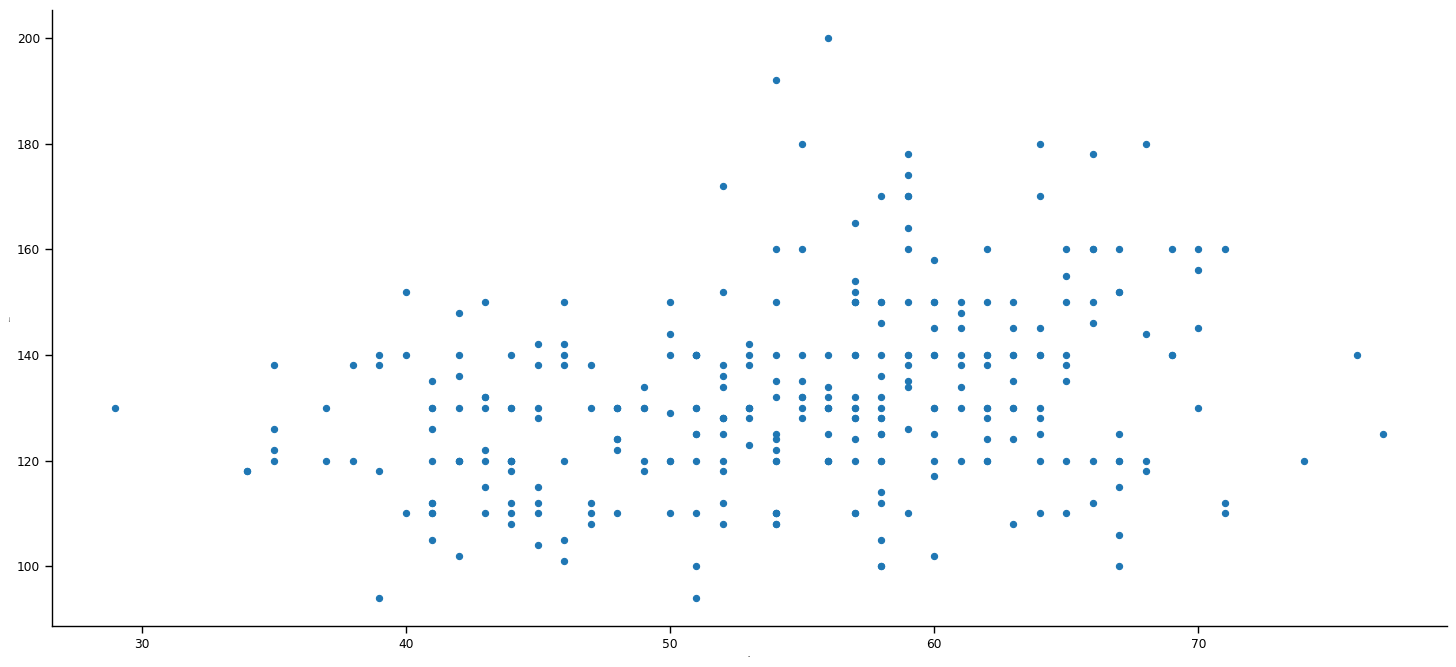

In [378]:
disease_data.plot(kind='scatter', x='age', y='trestbps')

<Axes: xlabel='age', ylabel='chol'>

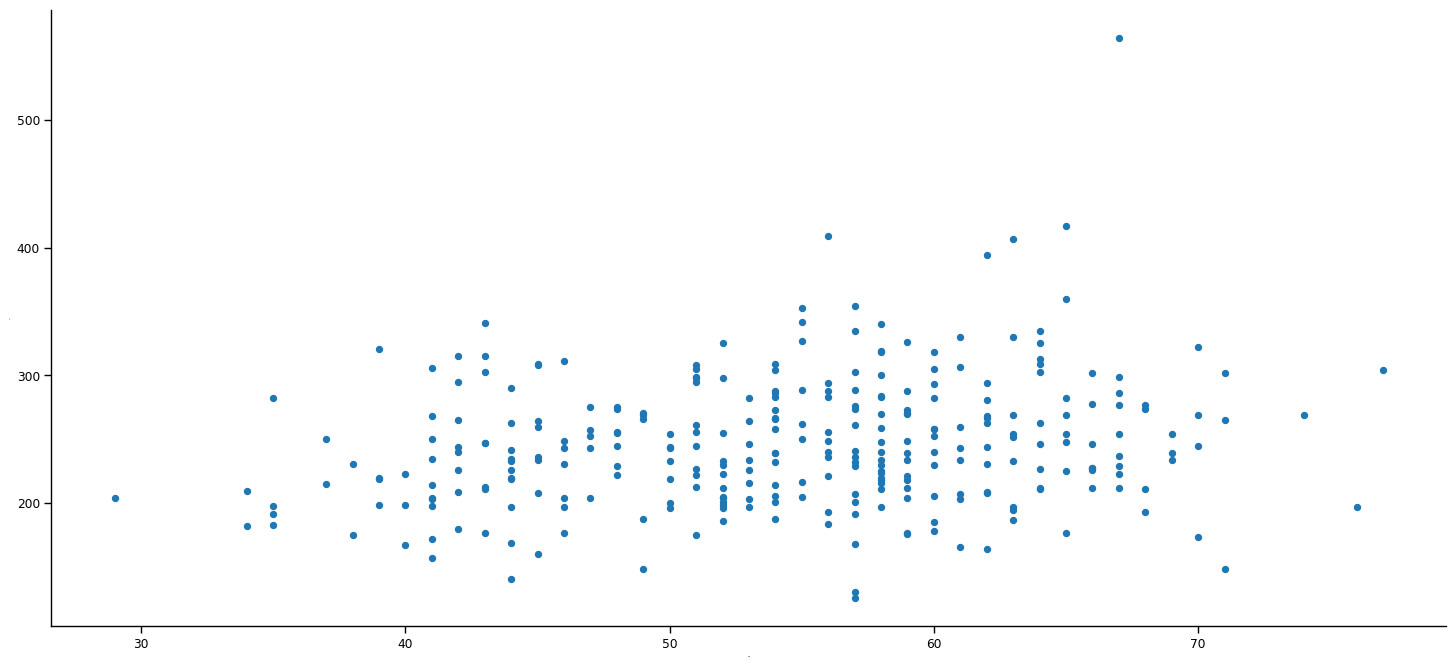

In [379]:
disease_data.plot(kind='scatter', x='age', y='chol')

<Axes: xlabel='age', ylabel='thalach'>

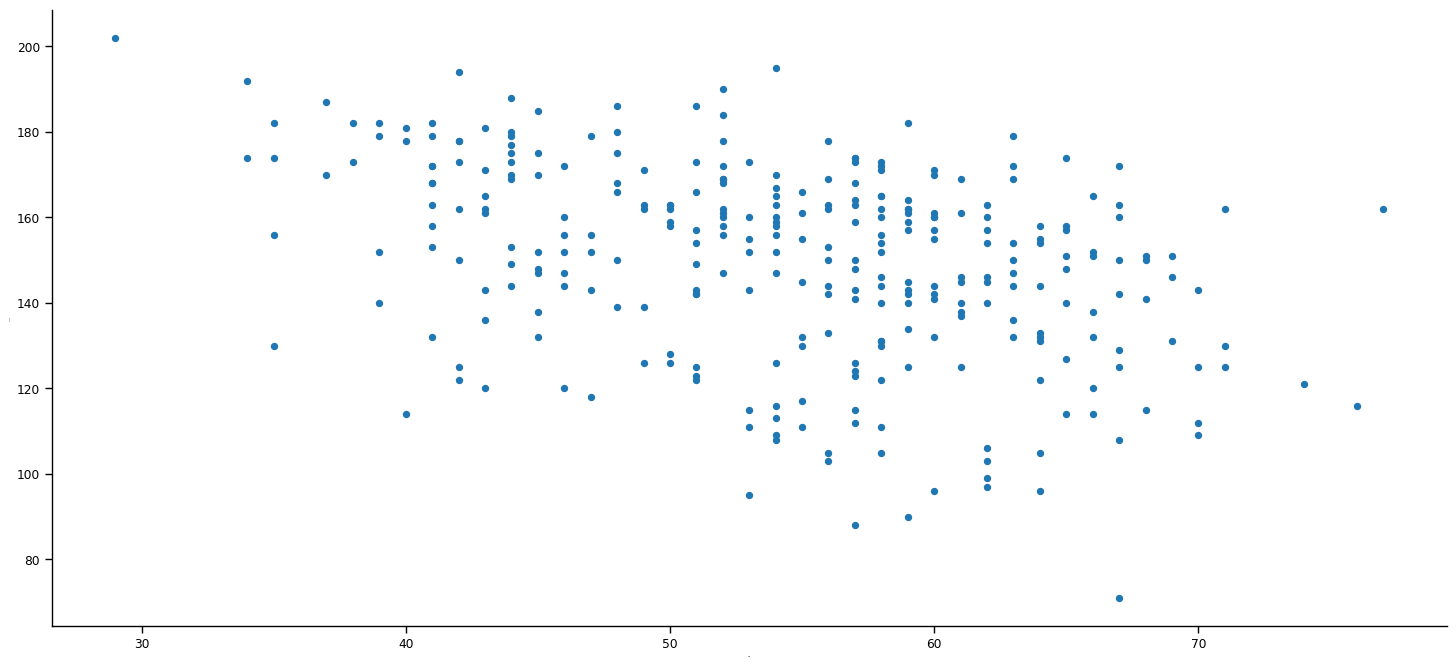

In [382]:
disease_data.plot(kind='scatter', x='age', y='thalach')

<Axes: xlabel='age', ylabel='oldpeak'>

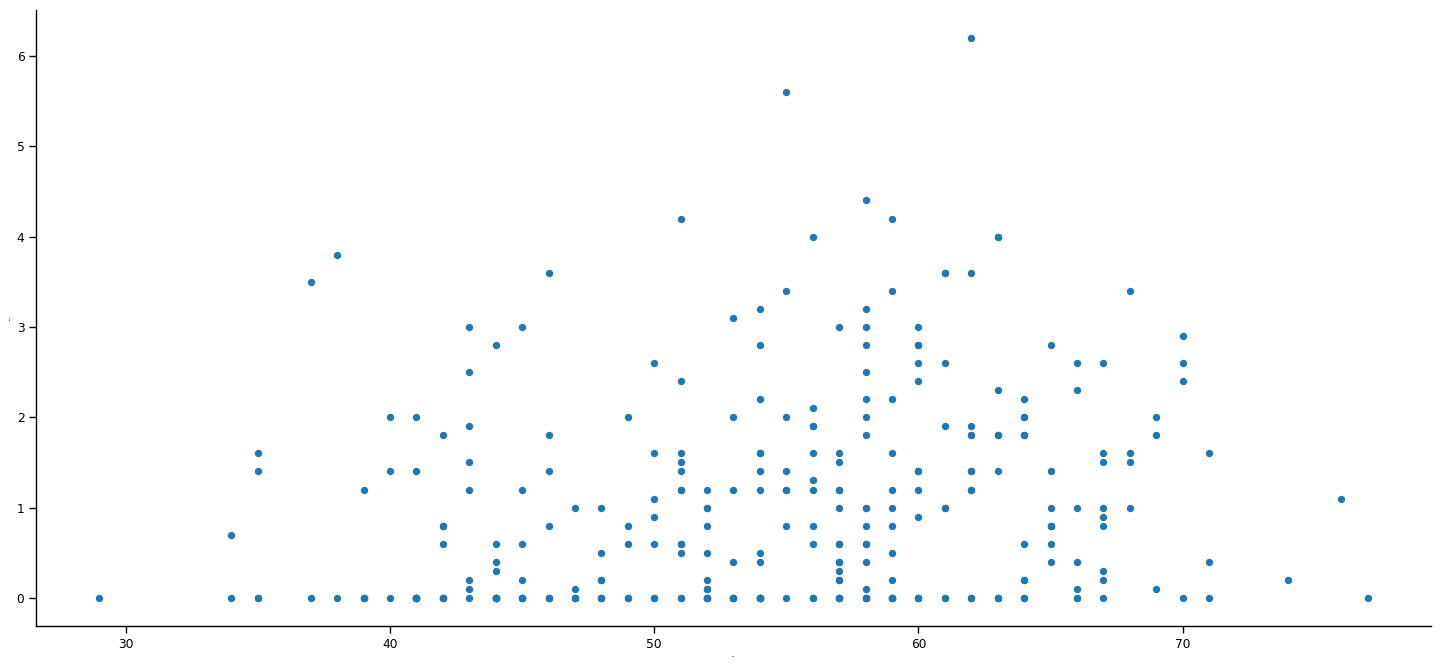

In [384]:
disease_data.plot(kind='scatter', x='age', y='oldpeak')

<Axes: >

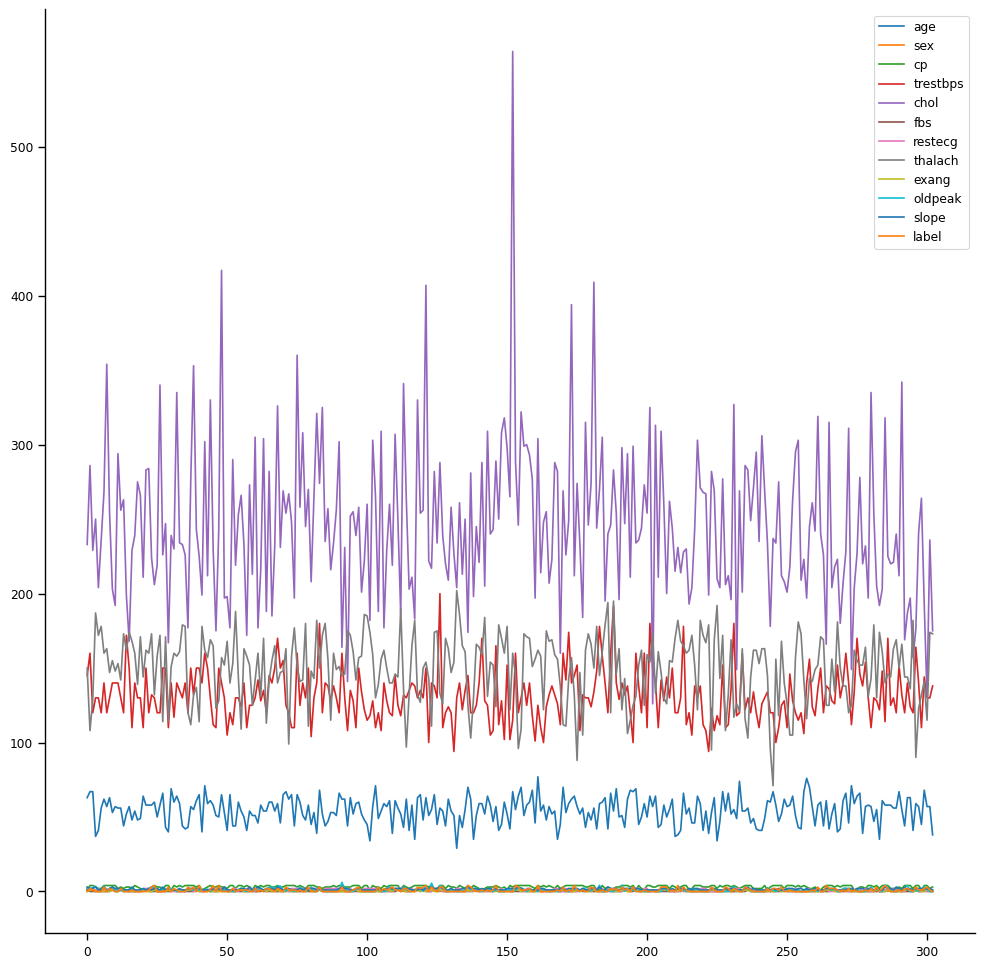

In [358]:
disease_data.plot(figsize = (12, 12 ))

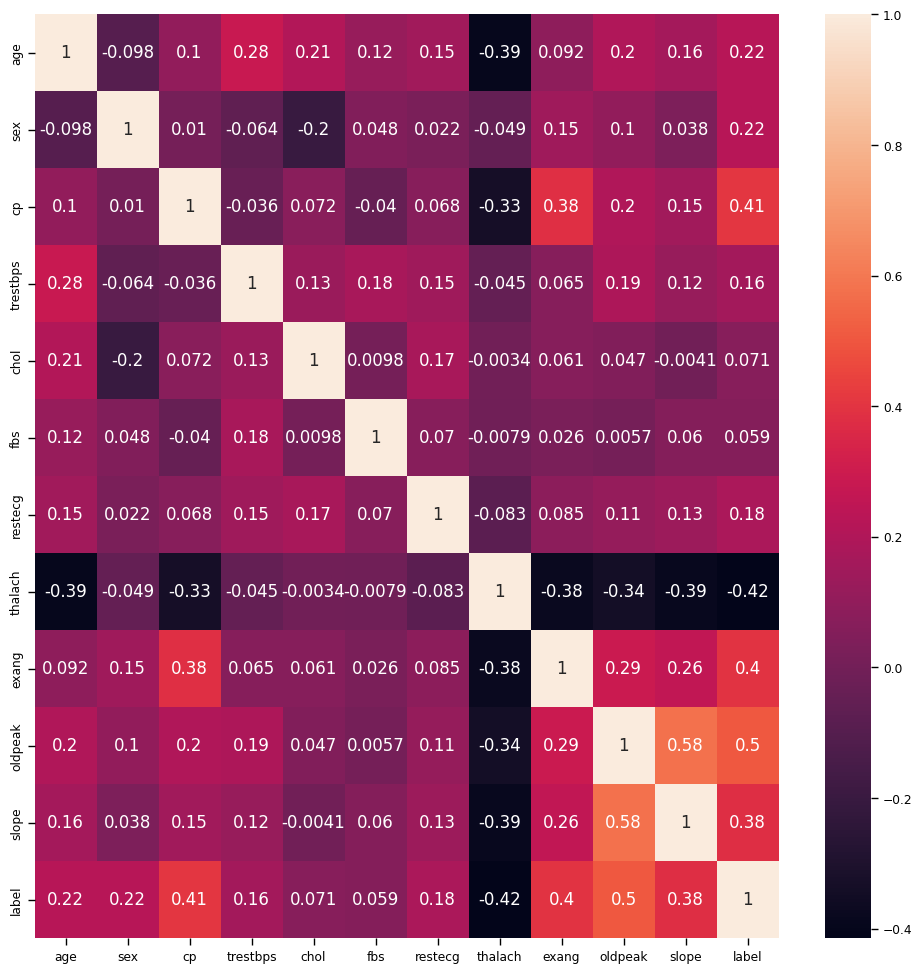

In [362]:
plt.figure(figsize=(12,12))
sns.heatmap(disease_data.corr(), annot=True,annot_kws={'size': 12})
plt.show()

<Axes: >

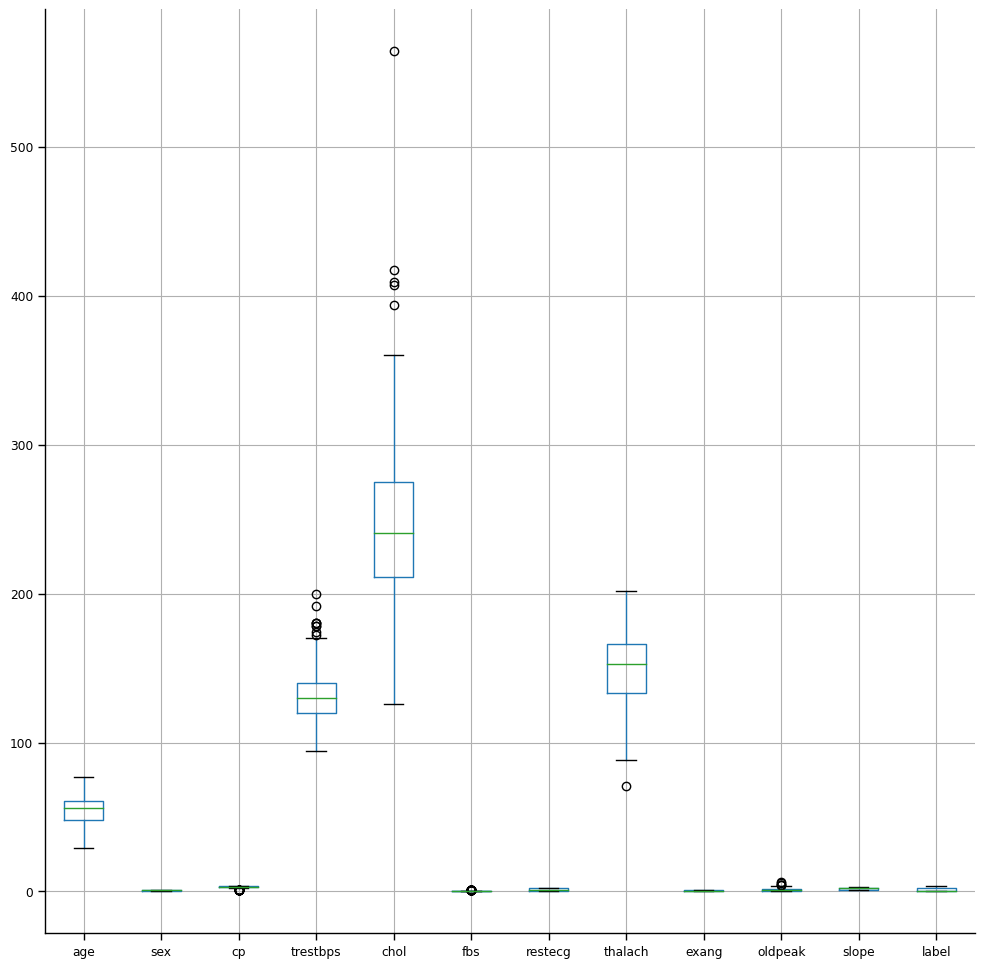

In [333]:
disease_data.boxplot(figsize = (12, 12))

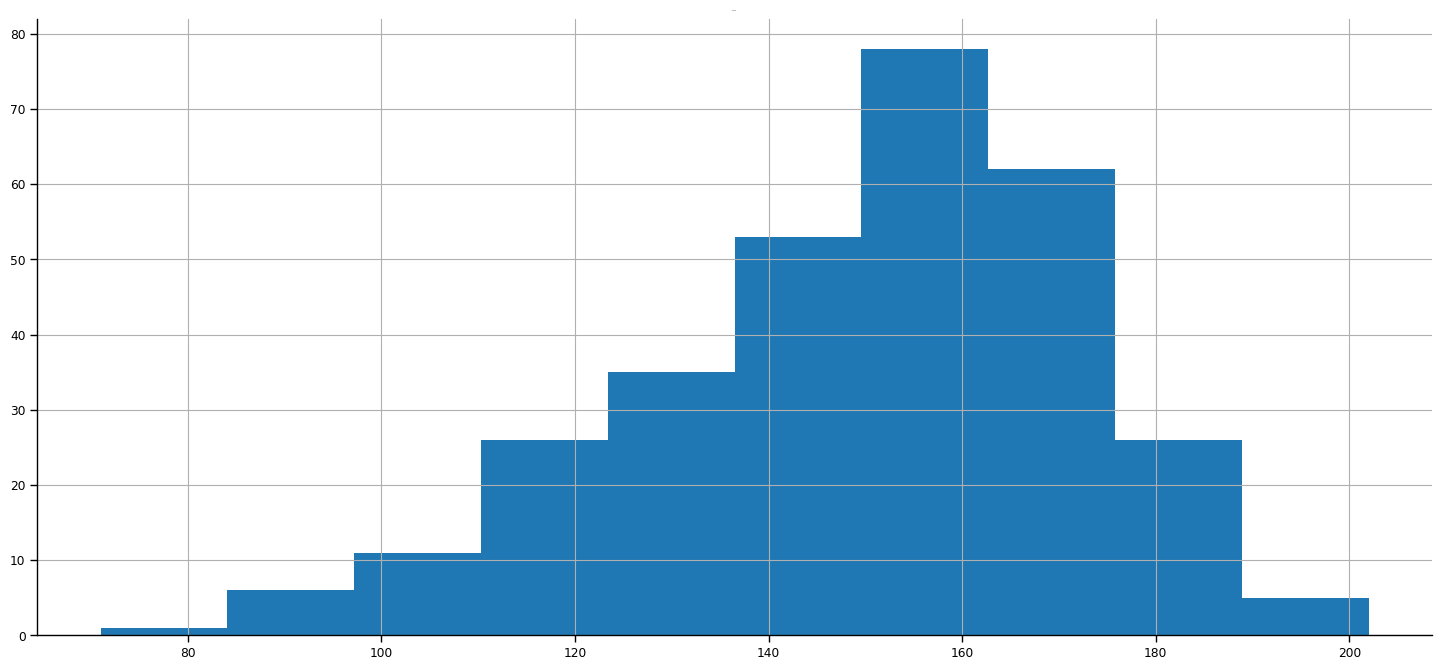

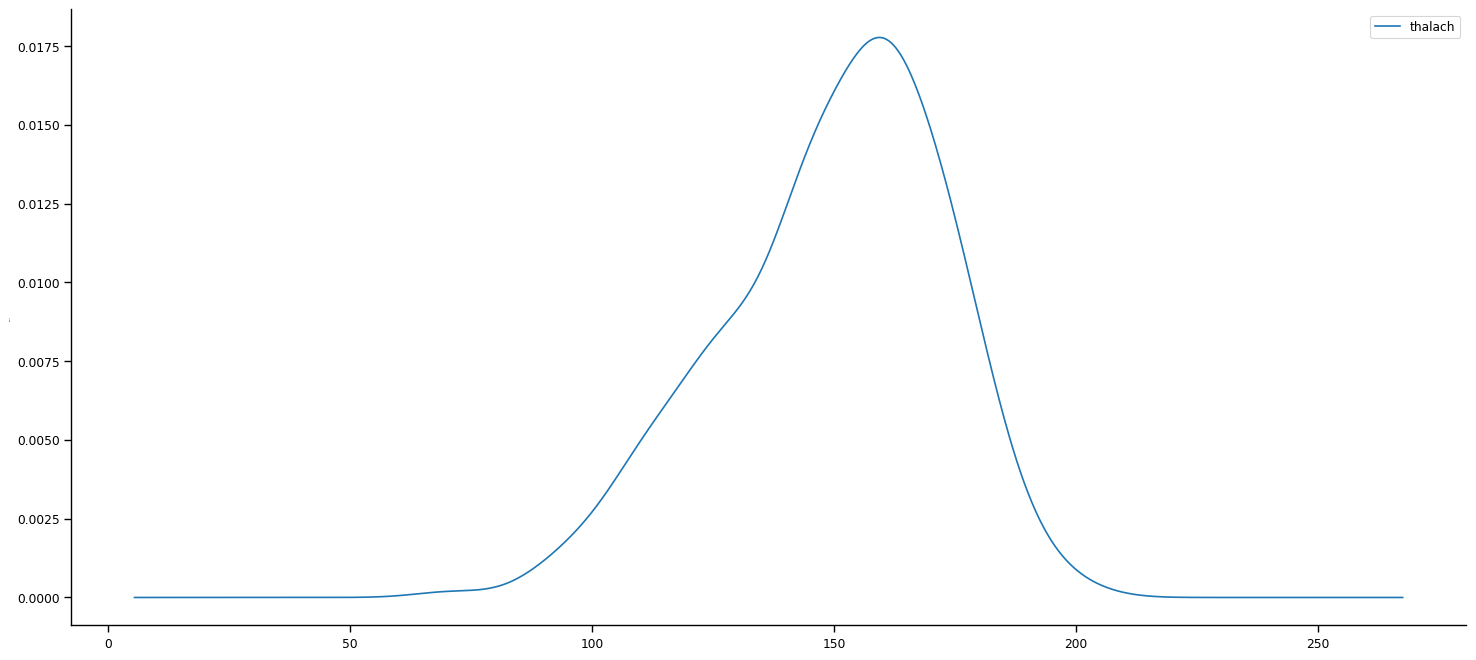

In [338]:
disease_data.hist(column="thalach")
disease_data.plot(kind="density", y="thalach")
plt.show()

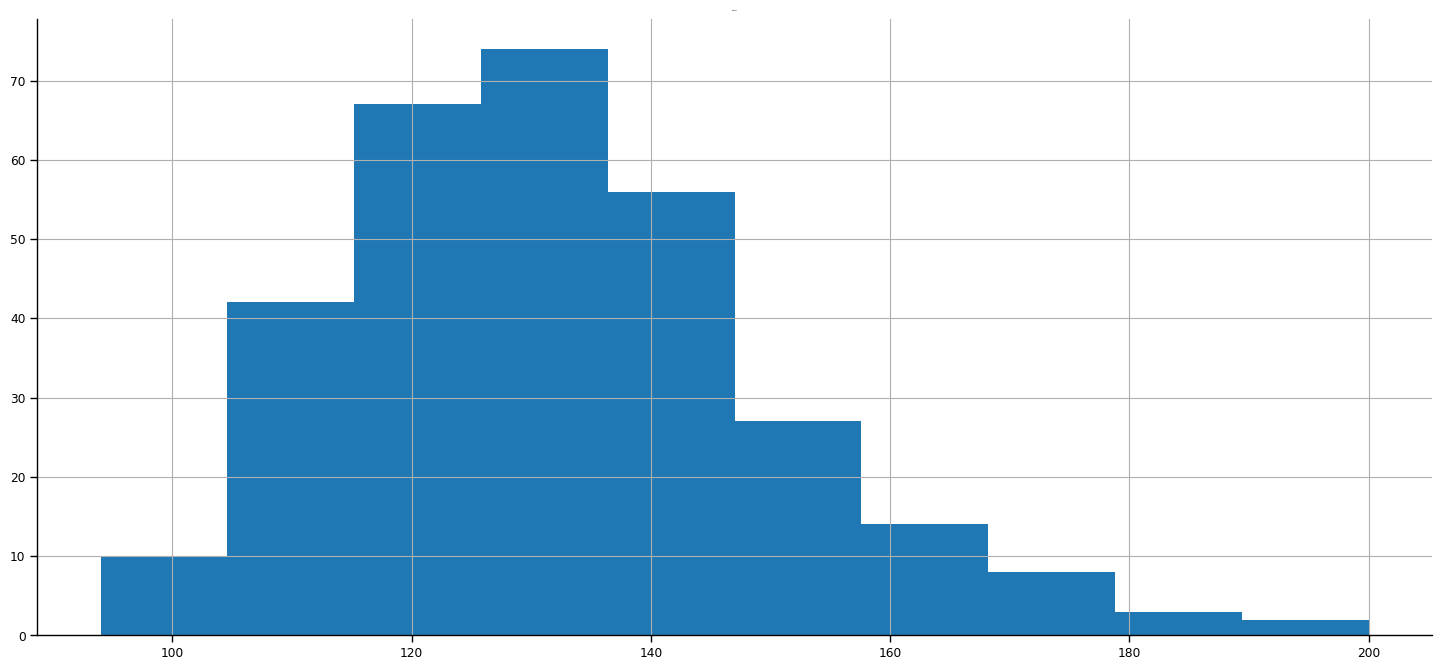

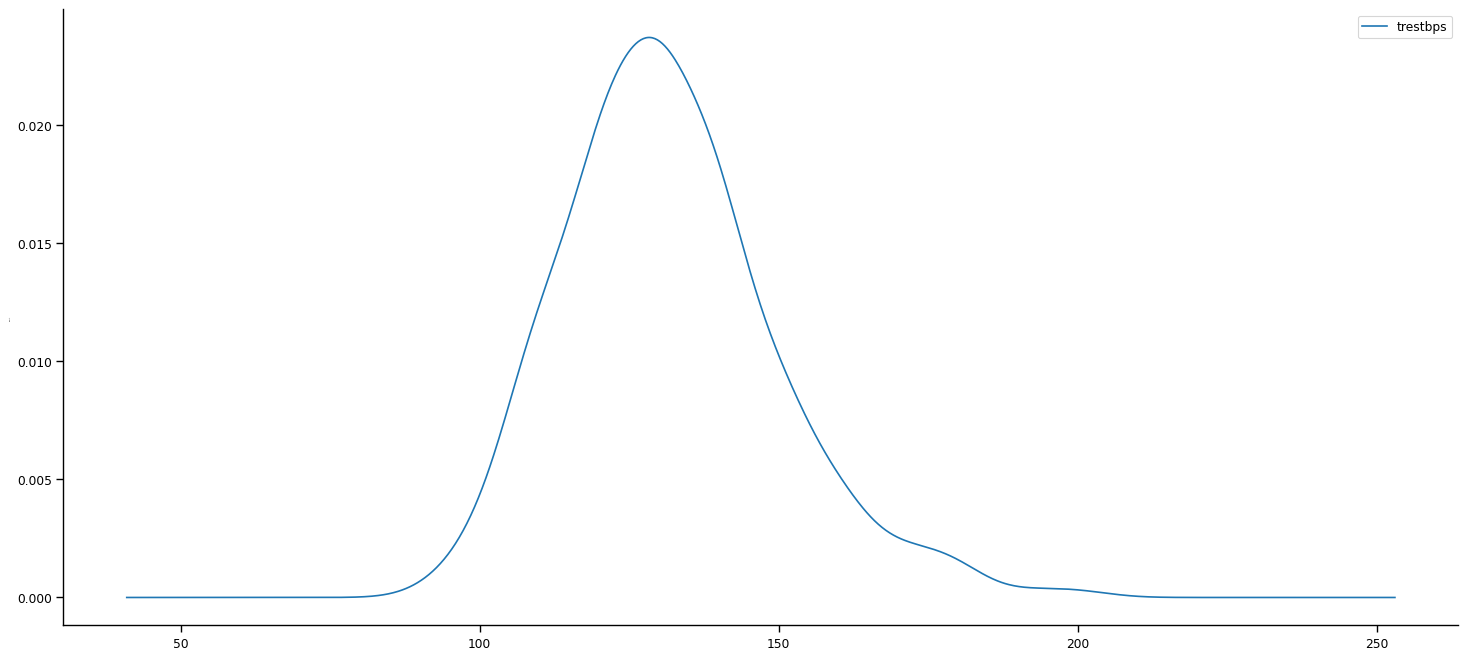

In [337]:
disease_data.hist(column="trestbps")
disease_data.plot(kind="density", y="trestbps")
plt.show()

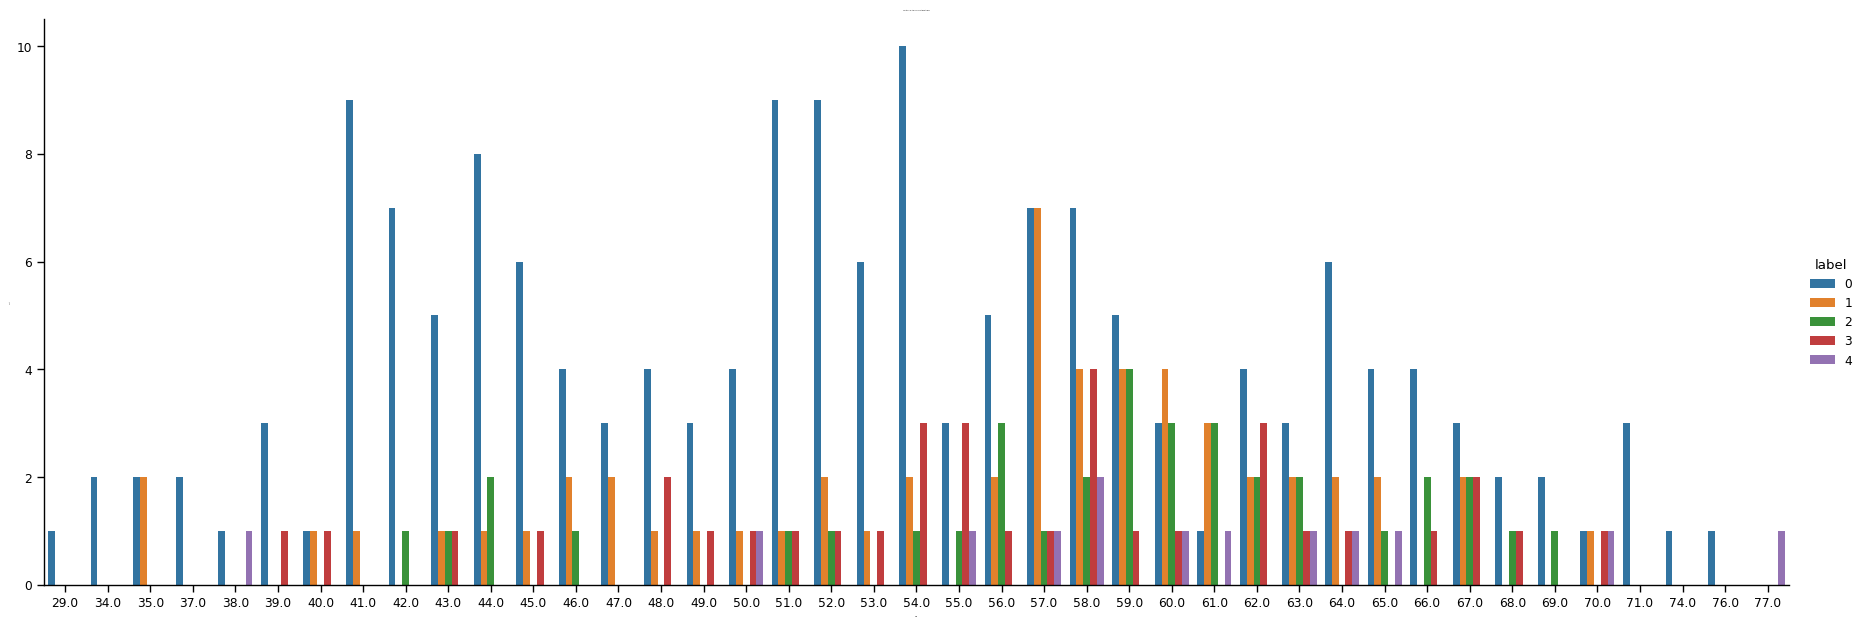

In [369]:
# distribution of target vs age 
sns.set_context("paper", font_scale = 1, rc = {"font.size": 1,"axes.titlesize": 1,"axes.labelsize": 1}) 
sns.catplot(kind = 'count', data = disease_data, x = 'age', hue = 'label', height=6, aspect=3,order = disease_data['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

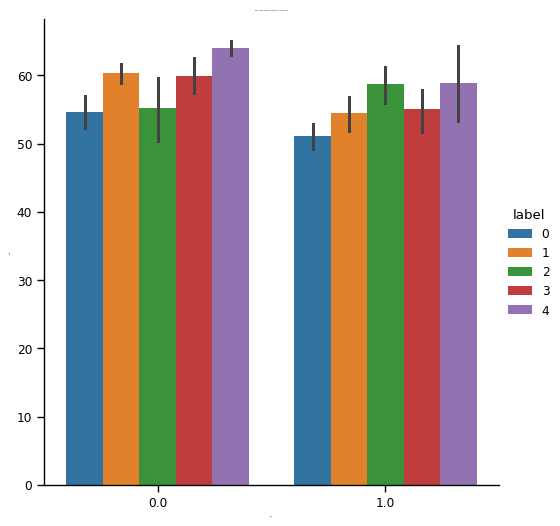

In [12]:
# barplot of age vs sex with hue = label
sns.catplot(kind = 'bar', data = disease_data, y = 'age', x = 'sex', hue = 'label')
plt.title('Distribution of age vs sex with the target class')
plt.show()

## Exploring Categorical Data

In [13]:
disease_data_categorical = disease_data.select_dtypes(include=['object'])

In [14]:
disease_data_categorical.head()

,ca,thal
0,0.0,6.0
1,3.0,3.0
2,2.0,7.0
3,0.0,3.0
4,0.0,3.0


In [15]:
disease_data_categorical.describe()

,ca,thal
count,303,303
unique,5,4
top,0.0,3.0
freq,176,166


In [16]:
disease_data_categorical['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [17]:
disease_data_categorical['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [18]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

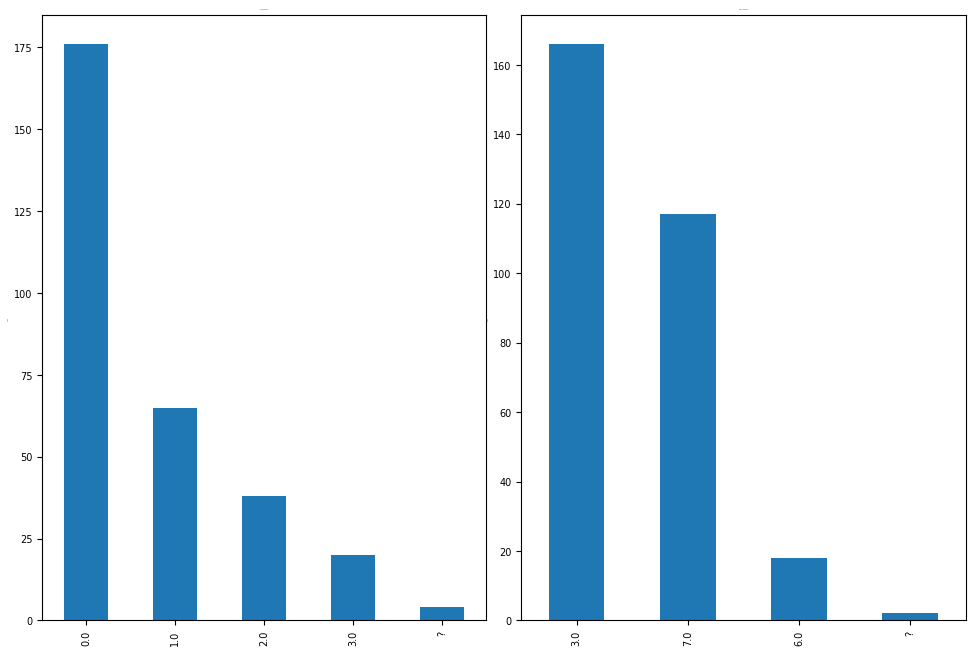

In [19]:
plotPerColumnDistribution(disease_data_categorical, 2, 2)
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#### **Replace ? data by most frequent data**

In [20]:
disease_data.loc[disease_data['ca']=='?','ca'] = '0.0'

In [21]:
disease_data.ca.unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [22]:
disease_data.loc[disease_data['thal']=='?','thal'] = '3.0'

In [23]:
disease_data.thal.unique()

array(['6.0', '3.0', '7.0'], dtype=object)

#### **One-Hot Encoding**

In [247]:
from sklearn.preprocessing import OneHotEncoder

In [248]:
disease_data_categorical_columns = disease_data_categorical.columns
disease_data_categorical_columns

Index(['ca', 'thal'], dtype='object')

In [250]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
disease_data_oh = pd.DataFrame(OH_encoder.fit_transform(disease_data[disease_data_categorical_columns])).astype(np.int64)

disease_data_oh.index = disease_data.index

disease_data_oh.columns = OH_encoder.get_feature_names_out(disease_data_categorical_columns)

In [251]:
disease_data_oh

,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,1,0,0,0,0,1,0
1,0,0,0,1,1,0,0
2,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0
4,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...
298,1,0,0,0,0,0,1
299,0,0,1,0,0,0,1
300,0,1,0,0,0,0,1
301,0,1,0,0,1,0,0


In [252]:
disease_data = disease_data.drop(disease_data_categorical_columns,axis = 1)

In [253]:
disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0


In [254]:
disease_data = pd.concat([disease_data,disease_data_oh],axis=1)

In [255]:
disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,label,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,1,0,0,0,0,1,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,2,0,0,0,1,1,0,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1,0,0,1,0,0,0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,1,0,0,0,1,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,1,0,0,0,1,0,0


## Analysing Target

<Axes: xlabel='label', ylabel='count'>

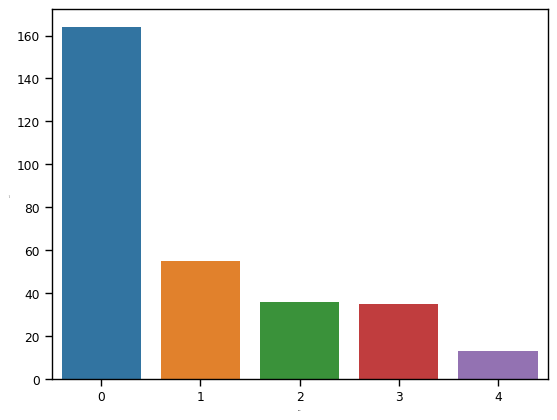

In [24]:
sns.countplot(x='label', data=disease_data)

#### **convert this problem to 0-1 classification model**

In [365]:
disease_data_copy = disease_data.copy()

In [366]:
disease_data_copy.loc[(disease_data_copy['label'] >= 1) & (disease_data_copy['label'] < 5)  , 'label'] = 1

<Axes: xlabel='label', ylabel='count'>

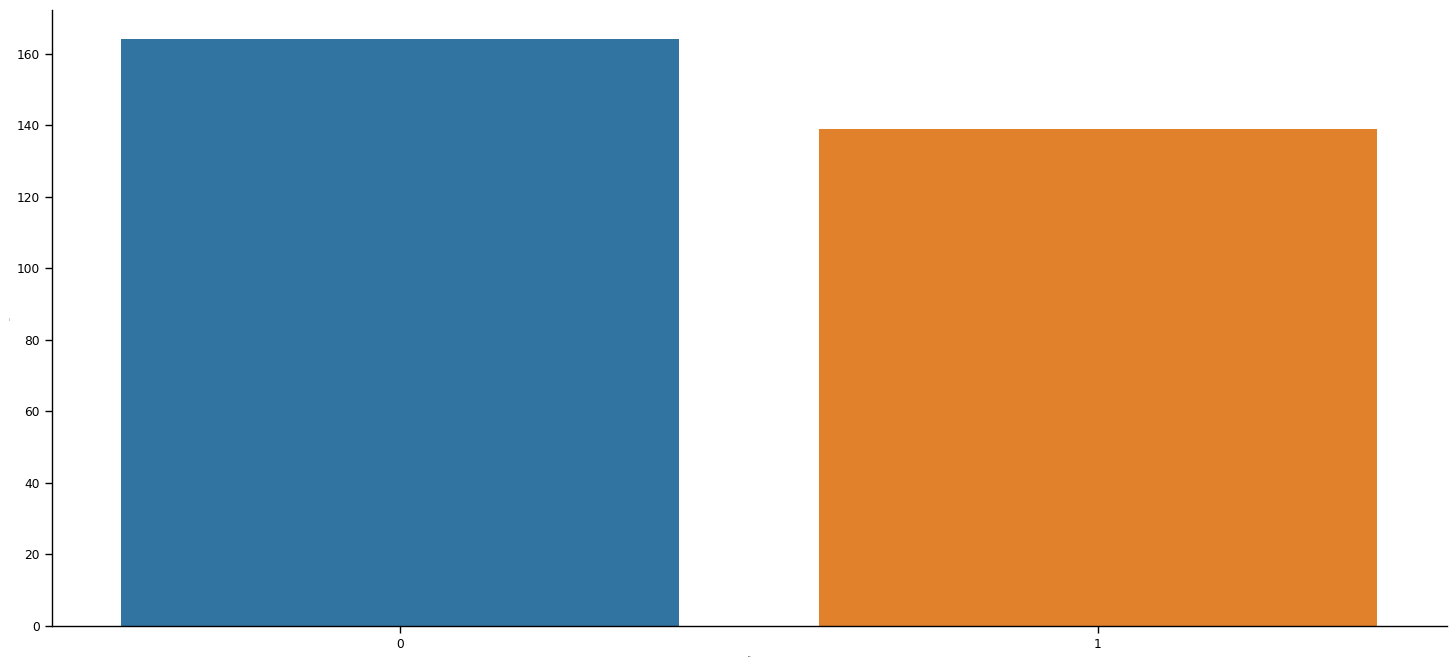

In [367]:
sns.countplot(x='label', data=disease_data_copy)

## **After convert into binary classification check relationship between features and label**

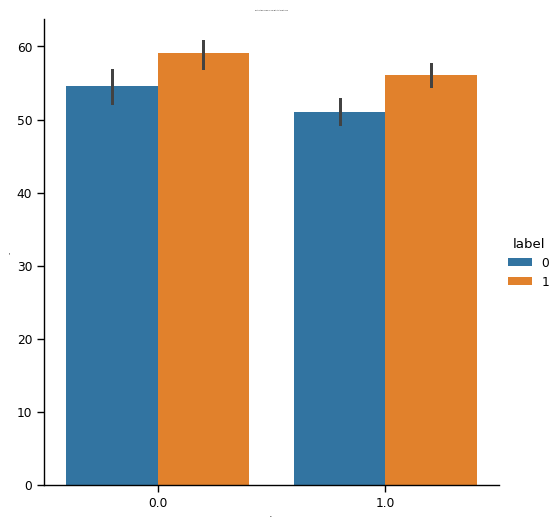

In [370]:
# barplot of age vs sex with hue = label
sns.catplot(kind = 'bar', data = disease_data_copy, y = 'age', x = 'sex', hue = 'label')
plt.title('Distribution of age vs sex with the target class')
plt.show()

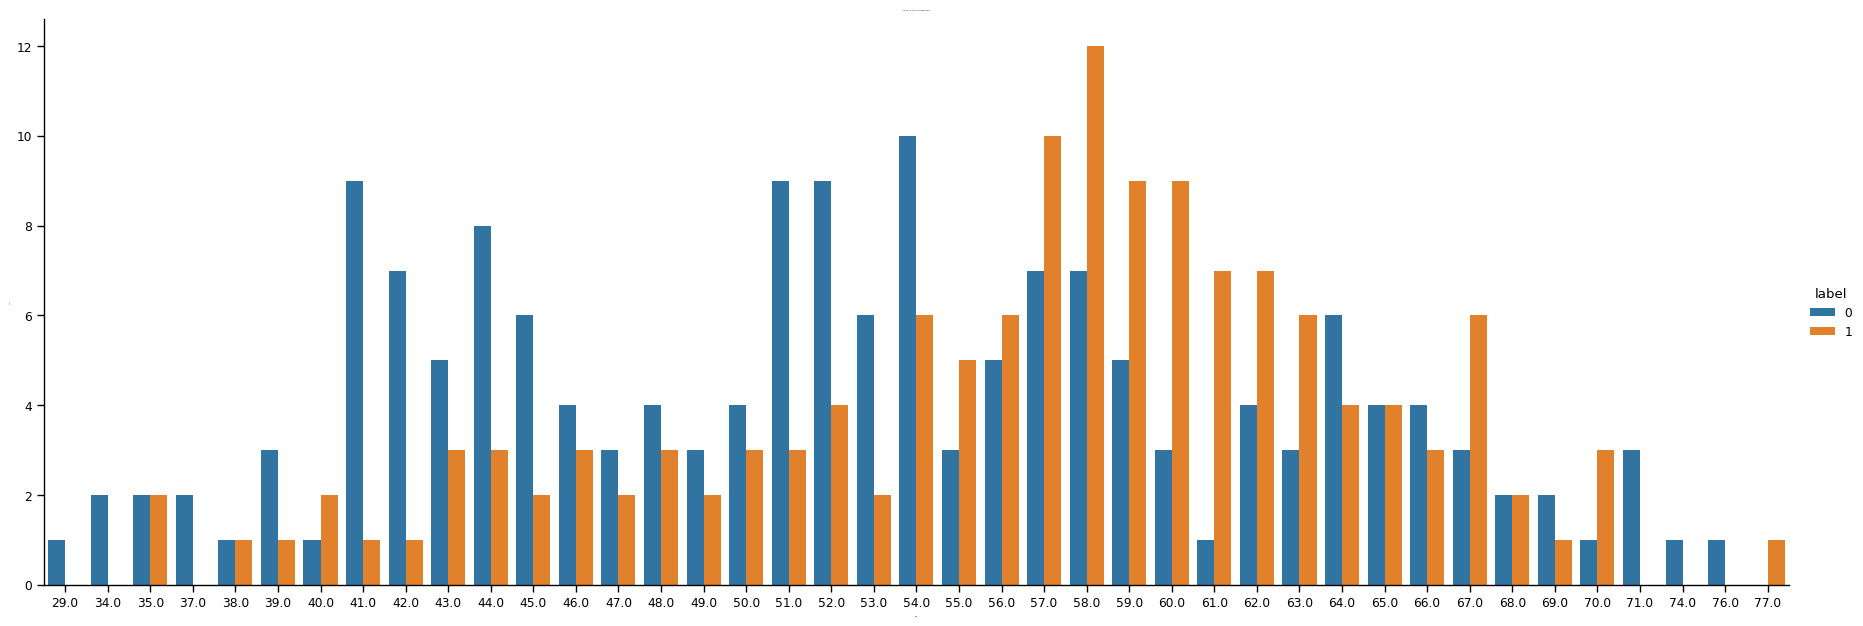

In [371]:
# distribution of target vs age 
sns.set_context("paper", font_scale = 1, rc = {"font.size": 1,"axes.titlesize": 1,"axes.labelsize": 1}) 
sns.catplot(kind = 'count', data = disease_data_copy, x = 'age', hue = 'label', height=6, aspect=3,order = disease_data_copy['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

In [259]:
disease_data_copy['label'].value_counts()

0    164
1    139
Name: label, dtype: int64

In [260]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = disease_data_copy[(disease_data_copy['label']==0)] 
df_minority = disease_data_copy[(disease_data_copy['label']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 164, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
disease_data_copy_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [261]:
disease_data_copy_upsampled['label'].value_counts()

1    164
0    164
Name: label, dtype: int64

In [262]:
disease_data_copy_upsampled.shape

(328, 19)

In [263]:
disease_data_copy_upsampled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,label,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
231,55.0,0.0,4.0,180.0,327.0,0.0,1.0,117.0,1.0,3.4,2.0,1,1,0,0,0,1,0,0
206,58.0,1.0,4.0,128.0,259.0,0.0,2.0,130.0,1.0,3.0,2.0,1,0,0,1,0,0,0,1
37,57.0,1.0,4.0,150.0,276.0,0.0,2.0,112.0,1.0,0.6,2.0,1,0,1,0,0,0,1,0
237,46.0,1.0,4.0,120.0,249.0,0.0,2.0,144.0,0.0,0.8,1.0,1,1,0,0,0,0,0,1
157,58.0,1.0,4.0,125.0,300.0,0.0,2.0,171.0,0.0,0.0,1.0,1,0,0,1,0,0,0,1


## Model Development

#### **Random Forest**

In [264]:
train_data_frame = disease_data_copy_upsampled.drop(['label'],axis = 1)
labels_train = disease_data_copy_upsampled.label

In [265]:
X_train, X_test, y_train, y_test = train_test_split(train_data_frame, labels_train, test_size=0.2, random_state=42)

In [266]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape

(262, 18)

In [186]:
clf_RF=RandomForestClassifier(criterion='entropy', n_estimators = 2000,min_samples_split=8,random_state=42,verbose=200)#RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0, max_depth=12,min_samples_leaf=10)
clf_RF.fit(X_train_scaled,y_train)

y_pred_RF=clf_RF.predict(X_test_scaled)
y_train_pred_RF = clf_RF.predict(X_train_scaled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 2000
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 2000
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 2000
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 2000
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
building tree 5 of 2000
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
building tree 6 of 2000
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
building tree 7 of 2000
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
building tree 8 of 2000
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
building tree 9 of 2000
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s re

In [187]:
print("train accuracy= ",metrics.accuracy_score(y_train, y_train_pred_RF))
print("test accuracy= ", metrics.accuracy_score(y_test, y_pred_RF))

train accuracy=  0.9628099173553719
test accuracy=  0.8852459016393442


In [188]:
confusion_matrix(y_pred_RF, y_test)

array([[27,  5],
       [ 2, 27]])

##### **Use Grid Search**

In [235]:
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators' : [300,500,1000],
    'min_samples_split' : [8,10,12],
    'max_features' : ['sqrt','log2'],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

cv = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [300, 500, 1000]})

In [236]:
cv.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [267]:
clf_RF_1=RandomForestClassifier(criterion='entropy',max_depth=10, max_features = 'sqrt',min_samples_leaf=1,n_estimators = 1000,min_samples_split=10,random_state=42,verbose=200)#RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0, max_depth=12,min_samples_leaf=10)
clf_RF_1.fit(X_train_scaled,y_train)

y_pred_RF_1=clf_RF_1.predict(X_test_scaled)
y_train_pred_RF_1 = clf_RF_1.predict(X_train_scaled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 1000
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 1000
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 1000
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 1000
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
building tree 5 of 1000
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
building tree 6 of 1000
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
building tree 7 of 1000
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
building tree 8 of 1000
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
building tree 9 of 1000
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s re

In [268]:
print("train accuracy= ",metrics.accuracy_score(y_train, y_train_pred_RF_1))
print("test accuracy= ", metrics.accuracy_score(y_test, y_pred_RF_1))

train accuracy=  0.9541984732824428
test accuracy=  0.9696969696969697


In [269]:
confusion_matrix(y_pred_RF_1, y_test)

array([[30,  0],
       [ 2, 34]])

#### **GradientBoostingClassifier**

In [270]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=14,max_features=0.5,min_samples_leaf=14,verbose=5)

GB.fit(X_train_scaled, y_train)  

      Iter       Train Loss   Remaining Time 
         1           1.3300            0.30s
         2           1.2812            0.29s
         3           1.2388            0.26s
         4           1.2004            0.24s
         5           1.1603            0.23s
         6           1.1190            0.22s
         7           1.0834            0.21s
         8           1.0552            0.20s
         9           1.0243            0.20s
        10           0.9981            0.20s
        11           0.9717            0.19s
        12           0.9442            0.19s
        13           0.9209            0.19s
        14           0.8949            0.19s
        15           0.8723            0.19s
        16           0.8494            0.19s
        17           0.8306            0.19s
        18           0.8093            0.19s
        19           0.7913            0.19s
        20           0.7704            0.19s
        21           0.7539            0.19s
        2

GradientBoostingClassifier(learning_rate=0.05, max_depth=14, max_features=0.5,
                           min_samples_leaf=14, verbose=5)

In [271]:
y_pred_GB=GB.predict(X_test_scaled)
y_train_pred_GB = GB.predict(X_train_scaled)
print("train accuracy= ",metrics.accuracy_score(y_train, y_train_pred_GB))
print("test accuracy= ", metrics.accuracy_score(y_test, y_pred_GB))

train accuracy=  0.9885496183206107
test accuracy=  0.9696969696969697


In [272]:
confusion_matrix(y_pred_GB, y_test)

array([[30,  0],
       [ 2, 34]])

#### **CatBoost**

In [222]:
%%capture
!pip install catboost

In [223]:
from catboost import CatBoostClassifier

In [274]:
X_train_CB, X_test_CB, y_train_CB, y_test_CB = train_test_split(train_data_frame, labels_train, test_size=0.2, random_state=42)

In [275]:
X_train_CB.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
30,69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,0,0,1,0,1,0,0
79,58.0,1.0,4.0,150.0,270.0,0.0,2.0,111.0,1.0,0.8,1.0,1,0,0,0,0,0,1
126,56.0,0.0,4.0,200.0,288.0,1.0,2.0,133.0,1.0,4.0,3.0,0,0,1,0,0,0,1
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,0,0,0,1,0,1,0
211,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,1,0,0,0,0,0,1


In [276]:
params= {'loss_function':'Logloss',
          'verbose': 500,
           'learning_rate':0.0008,
           'random_seed':42,
          'iterations':2000,
          'l2_leaf_reg':5,
          'depth':6
         }

model_catboost = CatBoostClassifier(**params)
model_catboost.fit(X_train_CB,y_train_CB)

0:	learn: 0.6924431	total: 3.25ms	remaining: 6.49s
500:	learn: 0.4840364	total: 492ms	remaining: 1.47s
1000:	learn: 0.3743565	total: 1.02s	remaining: 1.02s
1500:	learn: 0.3097965	total: 1.53s	remaining: 510ms
1999:	learn: 0.2659993	total: 2.04s	remaining: 0us


In [277]:
y_train_pred_CB = model_catboost.predict(X_train_CB)
y_pred_CB = model_catboost.predict(X_test_CB)
print("train accuracy= ",metrics.accuracy_score(y_train_CB, y_train_pred_CB))
print("test accuracy= ", metrics.accuracy_score(y_test_CB, y_pred_CB))

train accuracy=  0.9541984732824428
test accuracy=  0.9696969696969697


In [278]:
confusion_matrix(y_pred_CB, y_test_CB)

array([[30,  0],
       [ 2, 34]])

#### **Tensorflow RandomForest**

##### **Training a model with automated hyper-parameter tuning and automatic definition of the hyper-parameters**

In [211]:
%%capture
pip install tensorflow_decision_forests

In [212]:
import tensorflow_decision_forests as tfdf

In [309]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.20):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(disease_data_copy_upsampled)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

267 examples in training, 61 examples for testing.


In [310]:
label = "label"
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [311]:
# Create a Random Search tuner with 50 trials and automatic hp configuration.
tuner_2 = tfdf.tuner.RandomSearch(num_trials=100, use_predefined_hps=True)

# Define and train the model.
model_2 = tfdf.keras.RandomForestModel(tuner=tuner_2)
model_2.fit(train_ds, verbose=2)

Use /tmp/tmp6hhufdff as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'age': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'sex': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'cp': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'trestbps': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'chol': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'fbs': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'restecg': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>, 'thalach': <tf.Tensor 'data_7:0' shape=(None,) dtype=float64>, 'exang': <tf.Tensor 'data_8:0' shape=(None,) dtype=float64>, 'oldpeak': <tf.Tensor 'data_9:0' shape=(None,) dtype=float64>, 'slope': <tf.Tensor 'data_10:0' shape=(None,) dtype=float64>, 'ca_0.0': <tf.Tensor 'data_11:0' shape=(None,) dtype=int64>, 'ca_1.0': <tf.Tensor 'data_12:0' shape=(None,) dtype=int64>, 'ca_2.0': <tf.Tensor 'data_13:0' shape=(None,) dtype=int64>, 'ca_3.0': <tf.Tensor 'data_14:

[INFO 23-05-03 09:33:56.2270 UTC kernel.cc:773] Start Yggdrasil model training
[INFO 23-05-03 09:33:56.2270 UTC kernel.cc:774] Collect training examples
[INFO 23-05-03 09:33:56.2270 UTC kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-05-03 09:33:56.2272 UTC kernel.cc:393] Number of batches: 1
[INFO 23-05-03 09:33:56.2272 UTC kernel.cc:394] Number of examples: 267
[INFO 23-05-03 09:33:56.2274 UTC kernel.cc:794] Training dataset:
Number of records: 267
Number of columns: 19

Number of columns by type:
	NUMERICAL: 18 (94.7368%)
	CATEGORICAL: 1 (5.26316%)

Columns:

NUMERICAL: 18 (94.7368%)
	1: "age" NUMERICAL mean:54.2734 min:29 max:76 sd:9.36706


Model trained in 0:10:06.157442
Compiling model...
Model compiled.


In [322]:
# model_2.compile(["accuracy"])
# tuned_test_accuracy = model_2.evaluate(test_ds, return_dict=True, verbose=0)["accuracy"]
# print(f"Test accuracy with the TF-DF hyper-parameter tuner: {tuned_test_accuracy:.4f}")

In [313]:
# Display the tuning logs.
tuning_logs_2 = model_2.make_inspector().tuning_logs()
tuning_logs_2.head()

,score,evaluation_time,best,split_axis,sparse_oblique_projection_density_factor,sparse_oblique_normalization,sparse_oblique_weights,categorical_algorithm,winner_take_all,max_depth,min_examples
0,0.865169,9.994610,False,SPARSE_OBLIQUE,5.0,MIN_MAX,BINARY,CART,true,12,40
1,0.891386,15.589862,False,SPARSE_OBLIQUE,5.0,MIN_MAX,CONTINUOUS,CART,true,16,1
2,0.887640,22.677505,False,SPARSE_OBLIQUE,4.0,MIN_MAX,CONTINUOUS,RANDOM,true,16,10
3,0.868914,30.050810,False,SPARSE_OBLIQUE,1.0,MIN_MAX,CONTINUOUS,CART,true,20,10
4,0.913858,30.363941,True,SPARSE_OBLIQUE,4.0,STANDARD_DEVIATION,BINARY,CART,true,25,2


In [314]:
tuning_logs_2.loc[tuning_logs_2.best==True] #The single rows with best=True is the one used in the final model.

,score,evaluation_time,best,split_axis,sparse_oblique_projection_density_factor,sparse_oblique_normalization,sparse_oblique_weights,categorical_algorithm,winner_take_all,max_depth,min_examples
4,0.913858,30.363941,True,SPARSE_OBLIQUE,4.0,STANDARD_DEVIATION,BINARY,CART,true,25,2


In [315]:
# Best hyper-parameters.
tuning_logs_2[tuning_logs_2.best].iloc[0]

score                                                 0.913858
evaluation_time                                      30.363941
best                                                      True
split_axis                                      SPARSE_OBLIQUE
sparse_oblique_projection_density_factor                   4.0
sparse_oblique_normalization                STANDARD_DEVIATION
sparse_oblique_weights                                  BINARY
categorical_algorithm                                     CART
winner_take_all                                           true
max_depth                                                   25
min_examples                                                 2
Name: 4, dtype: object

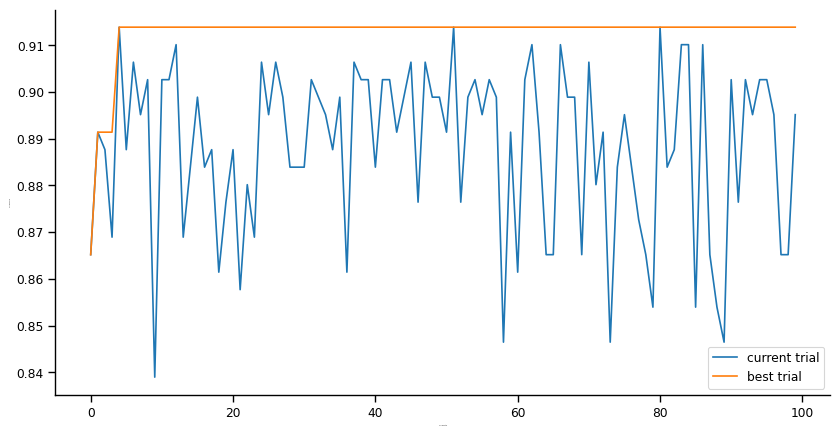

In [316]:
plt.figure(figsize=(10, 5))
plt.plot(tuning_logs_2["score"], label="current trial")
plt.plot(tuning_logs_2["score"].cummax(), label="best trial")
plt.xlabel("Tuning step")
plt.ylabel("Tuning score")
plt.legend()
plt.show()

In [317]:
prediction_trf = model_2.predict(test_ds)

1/1 [==============================] - 0s 70ms/step


ROC_AUC Score :  0.9307692307692309
Function for ROC_AUC Score :  0.9307692307692309
Threshold value is: 0.57666624


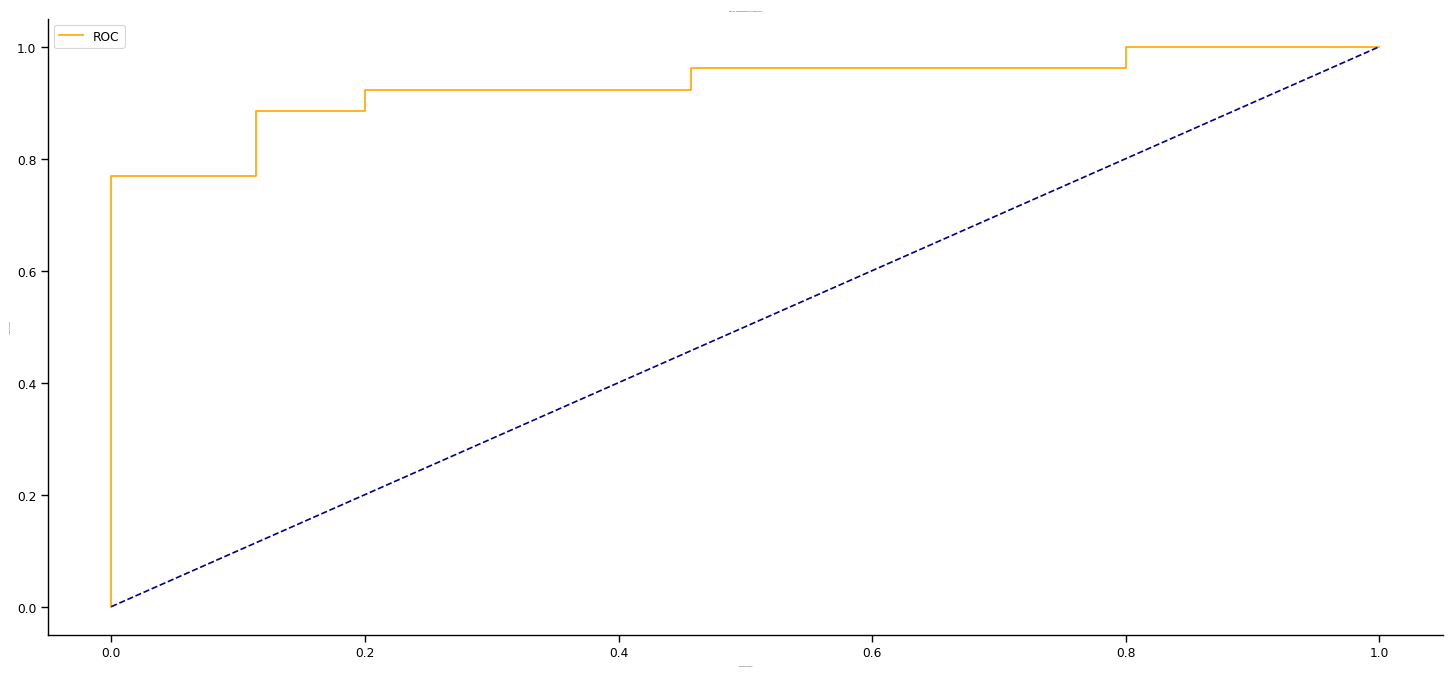

In [318]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
# Computing manually fpr, tpr, thresholds and roc auc 
fpr, tpr, thresholds = roc_curve(test_ds_pd.label, prediction_trf)
roc_auc = auc(fpr, tpr)
print("ROC_AUC Score : ",roc_auc)
print("Function for ROC_AUC Score : ",roc_auc_score(test_ds_pd.label, prediction_trf)) # Function present
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [319]:
prediction_classes_trf = [
    1 if prob > optimal_threshold else 0 for prob in np.ravel(prediction_trf)
]
prediction_classes_trf[:20]

[1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [320]:
print(confusion_matrix(test_ds_pd.label, prediction_classes_trf))

[[31  4]
 [ 4 22]]


In [321]:
print(f'Accuracy: {accuracy_score(test_ds_pd.label, prediction_classes_trf):.2f}')
print(f'Precision: {precision_score(test_ds_pd.label, prediction_classes_trf):.2f}')
print(f'Recall: {recall_score(test_ds_pd.label, prediction_classes_trf):.2f}')

Accuracy: 0.87
Precision: 0.85
Recall: 0.85


#### **Terraform Neural Network**

In [288]:
import tensorflow as tf
from tensorflow import keras

input_layer = tf.keras.layers.Input(shape=(18,), name='input_layer')
layer_1 = tf.keras.layers.Dense(64, name='layer_1',activation='relu')(input_layer)
layer_2 = tf.keras.layers.Dense(32, name='layer_2',activation='relu')(layer_1)
layer_3 = tf.keras.layers.Dense(16, name='layer_3',activation='relu')(layer_2)
output_layer = tf.keras.layers.Dense(1,  name='layer_4',activation='sigmoid')(layer_3)
model = tf.keras.models.Model(inputs=[input_layer], outputs=[output_layer])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(lr=0.04),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
print('\nModel Training')
history = model.fit(X_train_scaled, y_train, epochs=30)

print('\nModel Testing')
test_loss = model.evaluate(X_test_scaled, y_test)



Model Training
Epoch 1/30
9/9 [==============================] - 1s 4ms/step - loss: 0.6683 - accuracy: 0.5840 - precision: 0.8621 - recall: 0.1923     
Epoch 2/30
9/9 [==============================] - 0s 3ms/step - loss: 0.5509 - accuracy: 0.7595 - precision: 0.9241 - recall: 0.5615
Epoch 3/30
9/9 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.8282 - precision: 0.9048 - recall: 0.7308
Epoch 4/30
9/9 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.8740 - precision: 0.8880 - recall: 0.8538
Epoch 5/30
9/9 [==============================] - 0s 5ms/step - loss: 0.3851 - accuracy: 0.8702 - precision: 0.8692 - recall: 0.8692
Epoch 6/30
9/9 [==============================] - 0s 3ms/step - loss: 0.3550 - accuracy: 0.8740 - precision: 0.8760 - recall: 0.8692
Epoch 7/30
9/9 [==============================] - 0s 4ms/step - loss: 0.3348 - accuracy: 0.8702 - precision: 0.8692 - recall: 0.8692
Epoch 8/30
9/9 [==============================] 

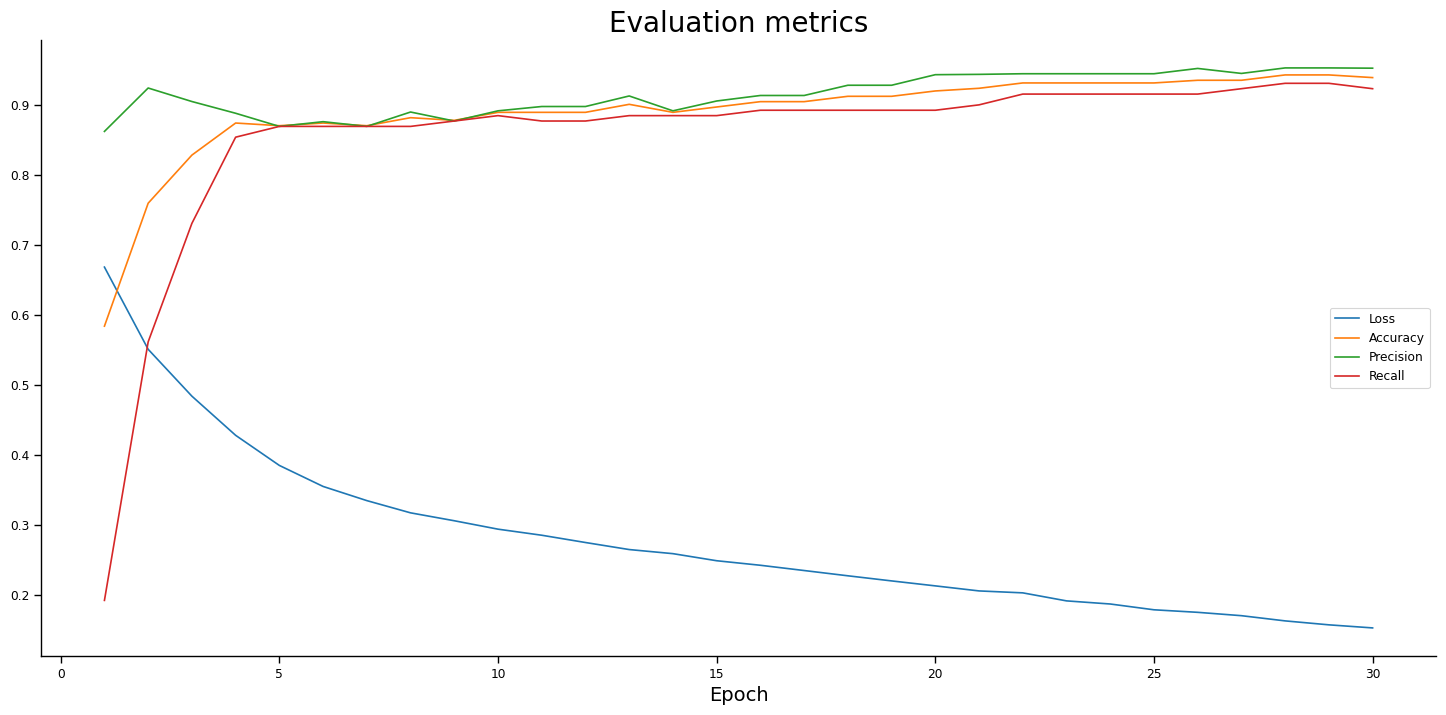

In [289]:
epochs = 30
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(
    np.arange(1, epochs+1), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, epochs+1), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, epochs+1), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, epochs+1), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [290]:
predictions = model.predict(X_test_scaled)
predictions

3/3 [==============================] - 0s 4ms/step


array([[0.00892126],
       [0.98452574],
       [0.16599457],
       [0.94043094],
       [0.78567266],
       [0.02496451],
       [0.233857  ],
       [0.10420654],
       [0.13051078],
       [0.96767974],
       [0.17858346],
       [0.02931825],
       [0.03420288],
       [0.9803238 ],
       [0.11174136],
       [0.925598  ],
       [0.9169252 ],
       [0.99996865],
       [0.9848538 ],
       [0.87552965],
       [0.89509094],
       [0.0167348 ],
       [0.9674529 ],
       [0.04570352],
       [0.9602948 ],
       [0.09677736],
       [0.9997683 ],
       [0.9049394 ],
       [0.9848538 ],
       [0.13330992],
       [0.02045678],
       [0.10951037],
       [0.16229525],
       [0.16681391],
       [0.03148727],
       [0.03251571],
       [0.9973772 ],
       [0.87552965],
       [0.9977993 ],
       [0.05976659],
       [0.01742439],
       [0.9929239 ],
       [0.9599046 ],
       [0.03627587],
       [0.9941141 ],
       [0.13758735],
       [0.97054046],
       [0.054

ROC_AUC Score :  0.9972426470588235
Function for ROC_AUC Score :  0.9972426470588235
Threshold value is: 0.45678055


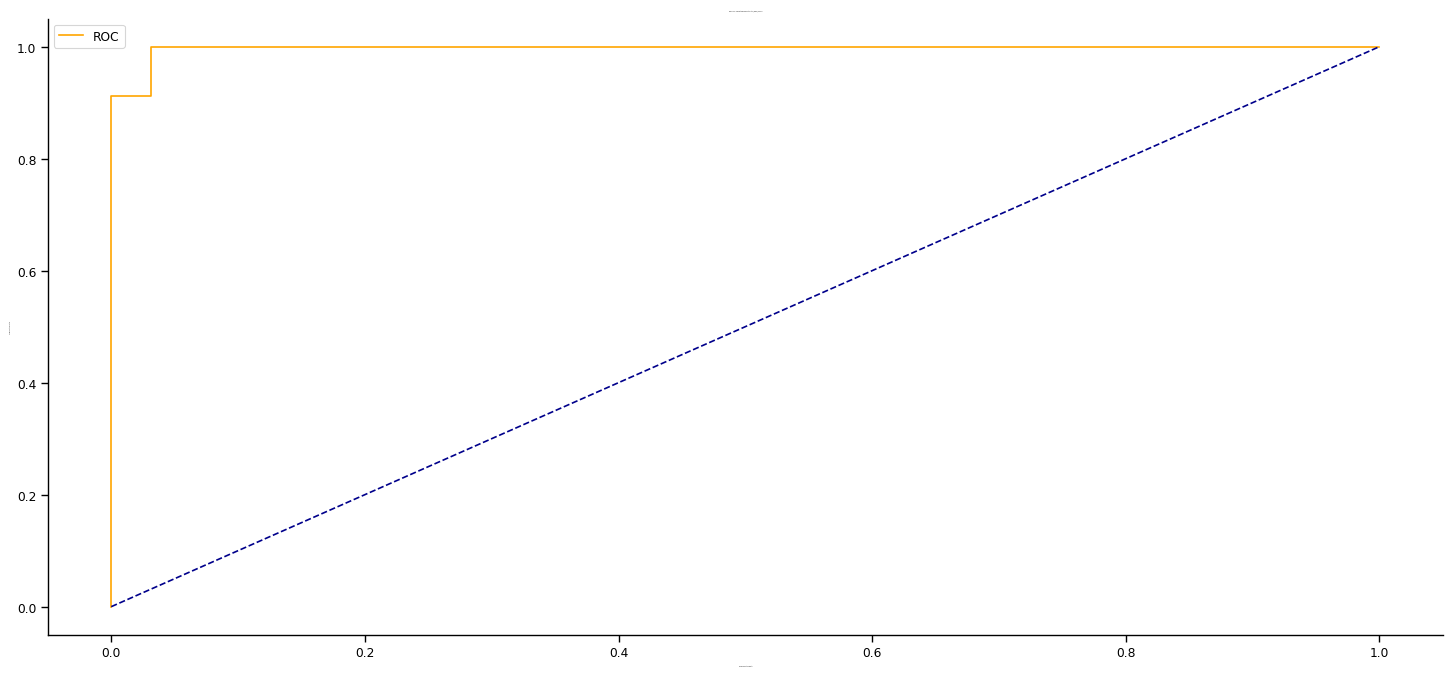

In [291]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
# Computing manually fpr, tpr, thresholds and roc auc 
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print("ROC_AUC Score : ",roc_auc)
print("Function for ROC_AUC Score : ",roc_auc_score(y_test, predictions)) # Function present
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [292]:
prediction_classes = [
    1 if prob > optimal_threshold else 0 for prob in np.ravel(predictions)
]
prediction_classes[:20]

[0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]

In [293]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction_classes))

[[31  1]
 [ 1 33]]


In [294]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.97
Precision: 0.97
Recall: 0.97


In [295]:
with tf.GradientTape() as tape:
    inputs = tf.constant(X_train_scaled)
    tape.watch(inputs)
    outputs = model(inputs)
grads = tape.gradient(outputs, inputs)

# Calculate the feature importances by taking the mean absolute value of the gradients
importances = np.mean(np.abs(grads), axis=0)

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'feature': disease_data.columns[:-1], 'importance': importances.reshape(-1)})

# Sort the features by importance and display the results
importance_df = importance_df.sort_values(by='importance', ascending=False)
print(importance_df)

     feature  importance
11     label    0.065875
2         cp    0.040203
9    oldpeak    0.039492
17  thal_6.0    0.032035
10     slope    0.031013
1        sex    0.030095
15    ca_3.0    0.029107
8      exang    0.028135
0        age    0.028034
3   trestbps    0.024386
6    restecg    0.024305
13    ca_1.0    0.024159
7    thalach    0.021720
12    ca_0.0    0.021027
4       chol    0.019226
5        fbs    0.019169
14    ca_2.0    0.017692
16  thal_3.0    0.017674


<Axes: ylabel='feature'>

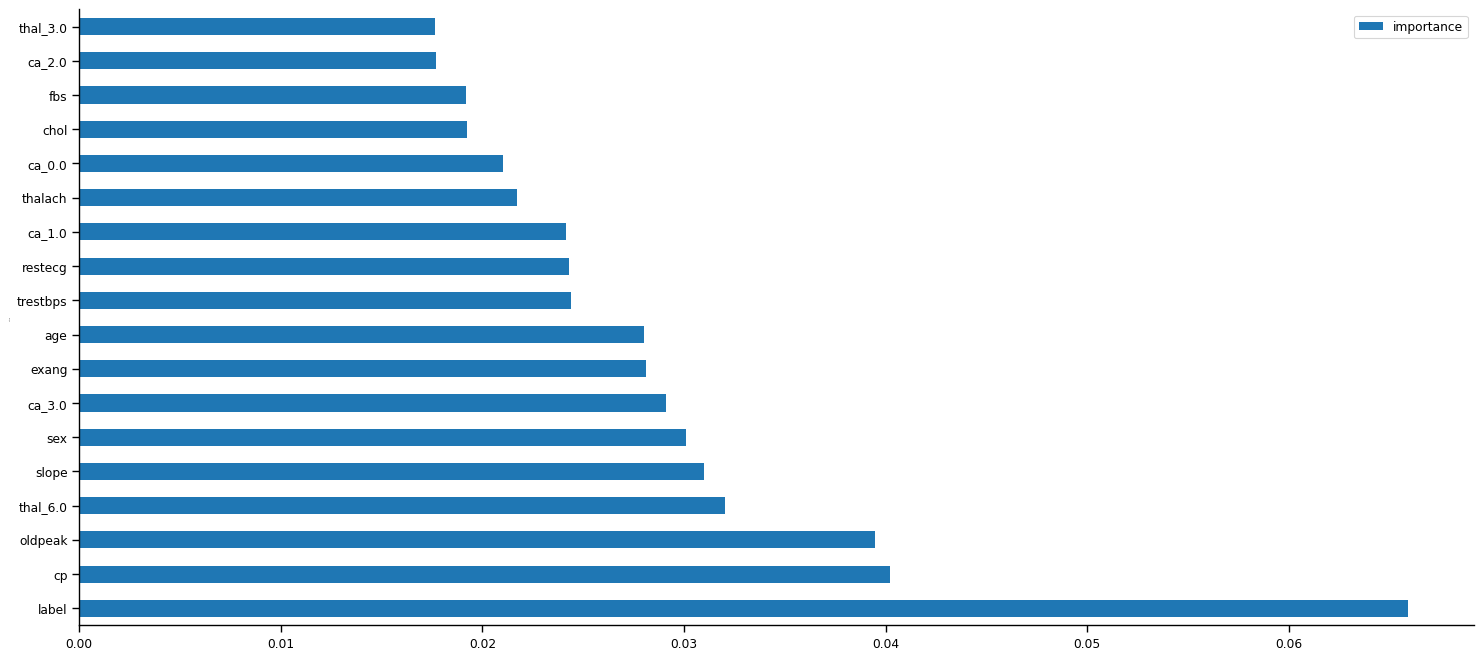

In [296]:
importance_df.plot.barh(x='feature', y='importance')

#### **Logistic Regression**

In [363]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model_lr.predict(X_test_scaled)

# Calculate accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 96.97%
